In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import QuantileTransformer
import wrangle


In [2]:
# Get telco data set

df = wrangle.wrangle_telco()

In [3]:
# Split the data
train, validate, test = wrangle.split_continuous(df)


train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


In [4]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61,4616.05
225,1303-SRDOK,69.05,55,3842.60
662,3967-VQOGC,24.90,67,1680.25
628,3777-XROBG,19.55,58,1079.65
824,5075-JSDKI,24.45,59,1493.10


In [5]:
train.describe()

,monthly_charges,tenure,total_charges
count,949.000000,949.000000,949.000000
mean,61.224921,56.502634,3729.846048
std,34.779455,18.331720,2599.832278
min,18.400000,1.000000,19.850000
25%,22.950000,47.000000,1237.650000
50%,64.700000,64.000000,3603.450000
75%,90.400000,71.000000,6052.250000
max,118.650000,72.000000,8670.100000


# Exercises

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

#### MinMaxScaler()

In [6]:
# min/max
mn_scaler = sklearn.preprocessing.MinMaxScaler()

In [7]:
# fit 
mn_scaler.fit(train[['monthly_charges']])

MinMaxScaler()

In [8]:
# add monthly_charges_minmax to train
train['monthly_charges_minmax'] = mn_scaler.transform(train[['monthly_charges']])

In [9]:
train.describe()

,monthly_charges,tenure,total_charges,monthly_charges_minmax
count,949.000000,949.000000,949.000000,949.000000
mean,61.224921,56.502634,3729.846048,0.427181
std,34.779455,18.331720,2599.832278,0.346927
min,18.400000,1.000000,19.850000,0.000000
25%,22.950000,47.000000,1237.650000,0.045387
50%,64.700000,64.000000,3603.450000,0.461845
75%,90.400000,71.000000,6052.250000,0.718204
max,118.650000,72.000000,8670.100000,1.000000


Text(0.5, 1.0, 'Scaled')

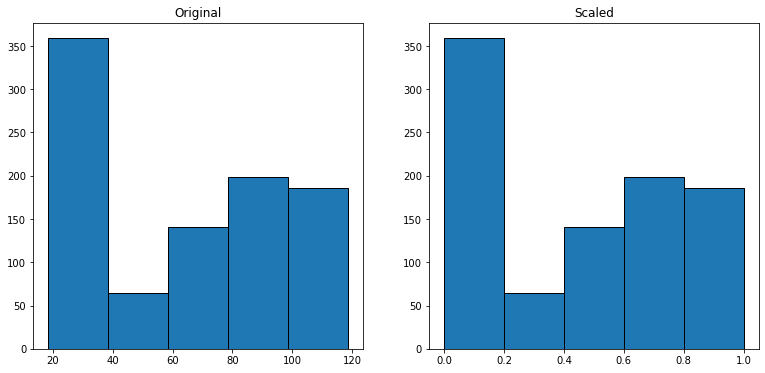

In [10]:
#plot data

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train['monthly_charges_minmax'], bins=5, ec='black')
plt.title('Scaled')

#### StandardScaler()

In [11]:
# standard
std_scaler = sklearn.preprocessing.StandardScaler()

In [12]:
# fit 
std_scaler.fit(train[['monthly_charges']])

StandardScaler()

In [13]:
# transform and add monthly_charges_std to train
train['monthly_charges_std'] = std_scaler.transform(train[['monthly_charges']])

In [14]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,monthly_charges_std
1256,7501-IWUNG,73.80,61,4616.05,0.552618,0.361757
225,1303-SRDOK,69.05,55,3842.60,0.505237,0.225110
662,3967-VQOGC,24.90,67,1680.25,0.064838,-1.044987
628,3777-XROBG,19.55,58,1079.65,0.011471,-1.198894
824,5075-JSDKI,24.45,59,1493.10,0.060349,-1.057932


Text(0.5, 1.0, 'Scaled')

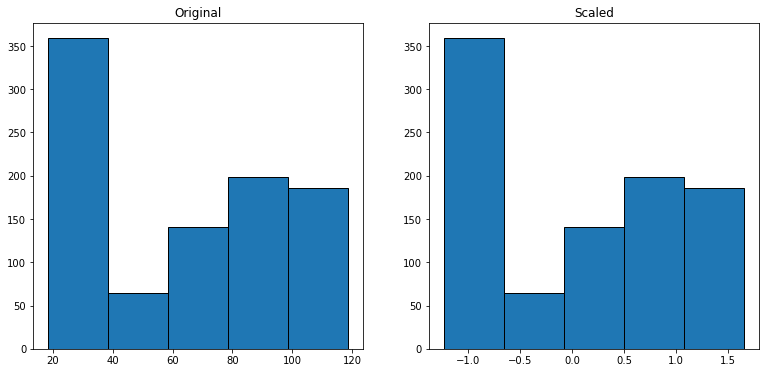

In [15]:
# Plot Data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train['monthly_charges_std'], bins=5, ec='black')
plt.title('Scaled')

#### RobustScaler()

In [16]:
# robust
rbs_scaler = sklearn.preprocessing.RobustScaler()

In [17]:
# fit 
rbs_scaler.fit(train[['monthly_charges']])

RobustScaler()

In [18]:
# transform and add monthly_charges_rbs to train
train['monthly_charges_rbs'] = rbs_scaler.transform(train[['monthly_charges']])

In [19]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,monthly_charges_std,monthly_charges_rbs
1256,7501-IWUNG,73.80,61,4616.05,0.552618,0.361757,0.134915
225,1303-SRDOK,69.05,55,3842.60,0.505237,0.225110,0.064492
662,3967-VQOGC,24.90,67,1680.25,0.064838,-1.044987,-0.590067
628,3777-XROBG,19.55,58,1079.65,0.011471,-1.198894,-0.669385
824,5075-JSDKI,24.45,59,1493.10,0.060349,-1.057932,-0.596738


Text(0.5, 1.0, 'Scaled')

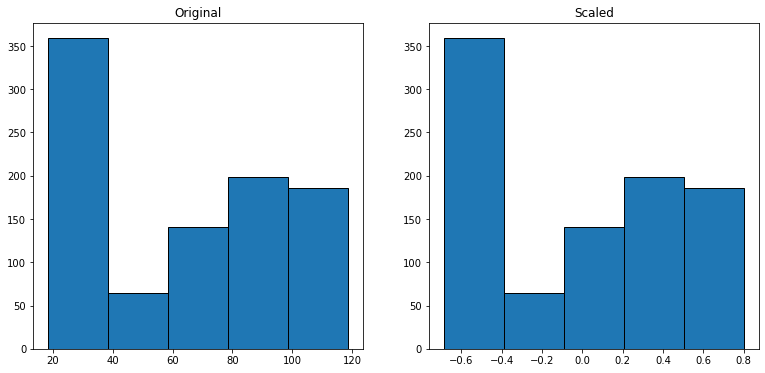

In [20]:
# Plot Data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train['monthly_charges_rbs'], bins=5, ec='black')
plt.title('Scaled')

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [21]:
# applying the .inverse_transfrom method to my RobustScaler output
x = rbs_scaler.inverse_transform(train[['monthly_charges_rbs']]) 

Text(0.5, 1.0, 'Scaled')

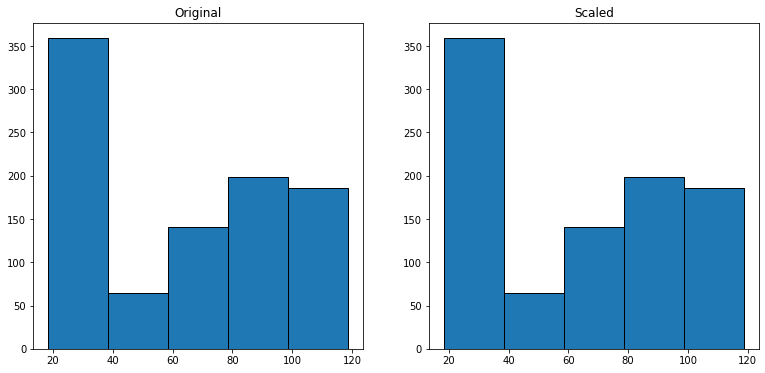

In [22]:
# Plot Data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x, bins=5, ec='black')
plt.title('Scaled')

The data reverts back to its original form

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

#### QuantileTransformer

In [94]:
# Set QauntileTransformer
qt_scaler = sklearn.preprocessing.QuantileTransformer(n_quantiles=10, output_distribution='normal')

In [95]:
# Fit 
train['monhtly_charges_qt'] = qt_scaler.fit_transform(train[['monthly_charges']])

In [98]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,monthly_charges_std,monthly_charges_rbs,monthly_charges_qt,tenure_qt,monhtly_charges_qt,monhtly_charges_qt2
1256,7501-IWUNG,73.80,61,4616.05,0.552618,0.361757,0.134915,0.166251,-0.139710,0.166251,0.566020
225,1303-SRDOK,69.05,55,3842.60,0.505237,0.225110,0.064492,0.069604,-0.430727,0.069604,0.527746
662,3967-VQOGC,24.90,67,1680.25,0.064838,-1.044987,-0.590067,-0.459864,0.139710,-0.459864,0.322807
628,3777-XROBG,19.55,58,1079.65,0.011471,-1.198894,-0.669385,-1.352407,-0.282216,-1.352407,0.088123
824,5075-JSDKI,24.45,59,1493.10,0.060349,-1.057932,-0.596738,-0.489396,-0.234219,-0.489396,0.312281


Text(0.5, 1.0, 'Scaled')

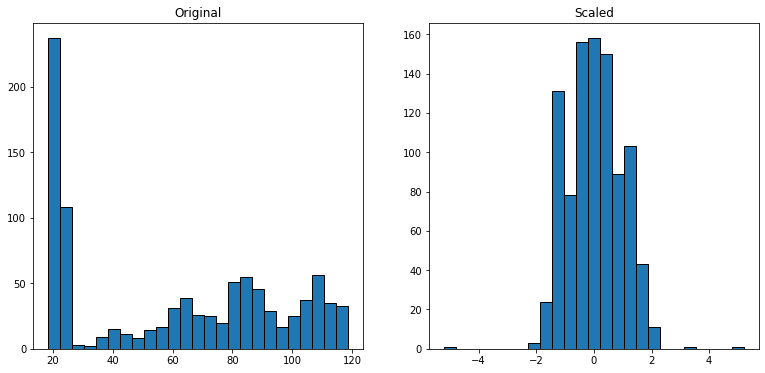

In [97]:
# Plot Data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train['monthly_charges_qt'], bins=25, ec='black')
plt.title('Scaled')

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


In [104]:
# Set QauntileTransformer
qt_scaler2 = sklearn.preprocessing.QuantileTransformer(n_quantiles=10)

In [105]:
# Fit 
train['monhtly_charges_qt2'] = qt_scaler2.fit_transform(train[['monthly_charges']])

In [106]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,monthly_charges_std,monthly_charges_rbs,monthly_charges_qt,tenure_qt,monhtly_charges_qt,monhtly_charges_qt2
1256,7501-IWUNG,73.80,61,4616.05,0.552618,0.361757,0.134915,0.166251,-0.139710,0.166251,0.566020
225,1303-SRDOK,69.05,55,3842.60,0.505237,0.225110,0.064492,0.069604,-0.430727,0.069604,0.527746
662,3967-VQOGC,24.90,67,1680.25,0.064838,-1.044987,-0.590067,-0.459864,0.139710,-0.459864,0.322807
628,3777-XROBG,19.55,58,1079.65,0.011471,-1.198894,-0.669385,-1.352407,-0.282216,-1.352407,0.088123
824,5075-JSDKI,24.45,59,1493.10,0.060349,-1.057932,-0.596738,-0.489396,-0.234219,-0.489396,0.312281


KeyError: 'monthly_charges_qt2'

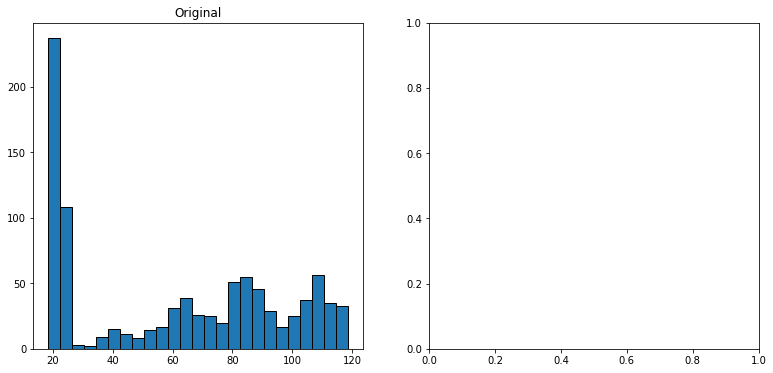

In [108]:
# Plot Data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['monthly_charges'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train['monthly_charges_qt2'], bins=25, ec='black')
plt.title('Scaled')

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
